Loading the Dataset and Importing Libraries needed for data manipulation, computation and visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

df = pd.read_csv('../data/sierraleone-bumbuna.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


Visiualizing summary & missing values

In [2]:
df.describe()
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Check for outliers sing Z-Score

In [3]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns_to_check].apply(zscore)
df_no_outliers = df[(z_scores.abs() <= 3).all(axis=1)]

 Handling missing values

In [4]:
df_cleaned = df_no_outliers.fillna(df_no_outliers.median(numeric_only=True))

Save Cleaned Data to the CSV file

In [5]:
df_cleaned.to_csv('../data/sierra_leone_clean.csv', index=False)

Final data visualization

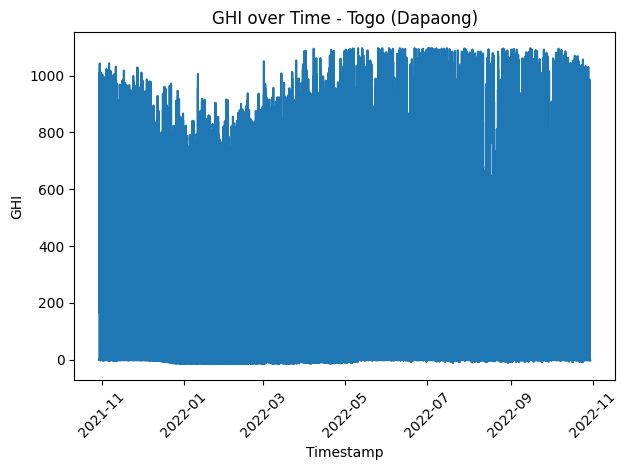

In [6]:
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
sns.lineplot(data=df_cleaned, x='Timestamp', y='GHI')
plt.title('GHI over Time - Togo (Dapaong)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cleaning Impact

<Axes: xlabel='Cleaning'>

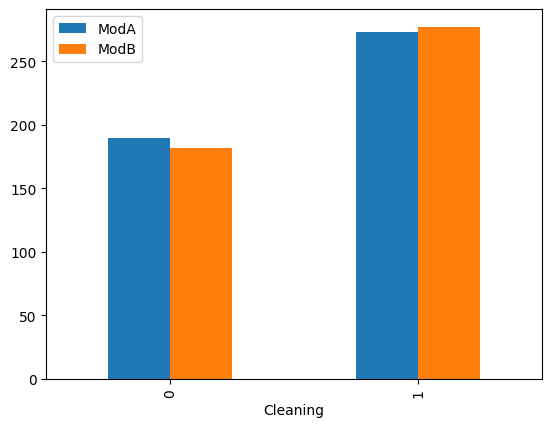

In [7]:
df_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')

Correlation Heatmap

<Axes: >

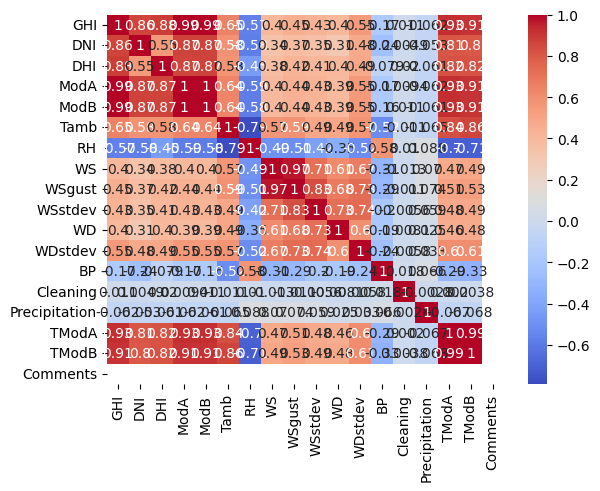

In [8]:
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')

Scatter Plots

<Axes: xlabel='WS', ylabel='GHI'>

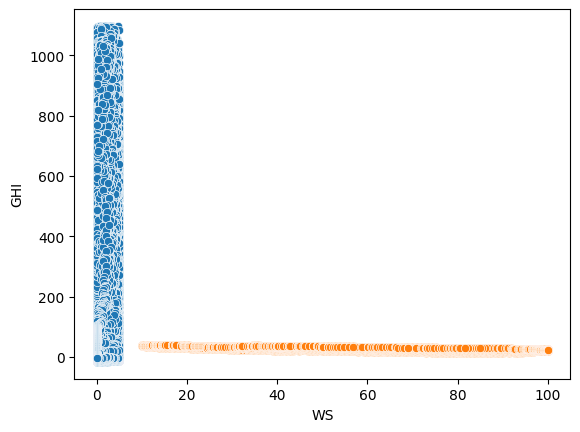

In [9]:
sns.scatterplot(x='WS', y='GHI', data=df_cleaned)
sns.scatterplot(x='RH', y='Tamb', data=df_cleaned)